In [10]:
import numpy as np
import xarray as xr
from xmitgcm import llcreader
import matplotlib.pyplot as  plt

from intake import open_catalog
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/llc4320.yaml")
display(list(cat))

# Get variables from catalog
grid = cat.LLC4320_grid.to_dask()
sst = cat.LLC4320_SST.to_dask()
u = cat.LLC4320_SSU.to_dask()
v = cat.LLC4320_SSV.to_dask()

u.U.attrs = {'long_name': 'Zonal Velocity (m/s)', 
            'mate': 'V', 'units':'m/s'}
v.V.attrs = {'long_name': 'Meridional Velocity (m/s)', 
            'mate': 'U', 'units':'m/s'}

ds = xr.merge([grid,sst, u, v])
ds = llcreader.llcmodel.faces_dataset_to_latlon(ds, metric_vector_pairs=[('dxC', 'dyC'), ('dyG', 'dxG')])
display(ds)


['LLC4320_grid',
 'LLC4320_SST',
 'LLC4320_SSS',
 'LLC4320_SSH',
 'LLC4320_SSU',
 'LLC4320_SSV']

<xarray.Dataset>
Dimensions:  (face: 13, i: 17280, i_g: 17280, j: 12960, j_g: 12960, k_p1: 2,
              time: 9030)
Coordinates: (12/37)
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * i_g      (i_g) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * j        (j) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * j_g      (j_g) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * k_p1     (k_p1) int64 0 1
    ...       ...
    rAw      (j, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    rAz      (j_g, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    dxC      (j, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    dyC      (j_g, i) float32 dask.array<chunksize=(1, 4320), meta=np.ndarray>
    dyG      (j, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    dxG      (j_g, i) float32 dask.array<chunksize=(1, 4320), meta=np.ndarray>
Data variables:
    SST      (time, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    U        (time, j, i_g) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    V        (time, j_g, i) float32 dask.array<chunksize=(1, 1, 4320), meta=np.ndarray>

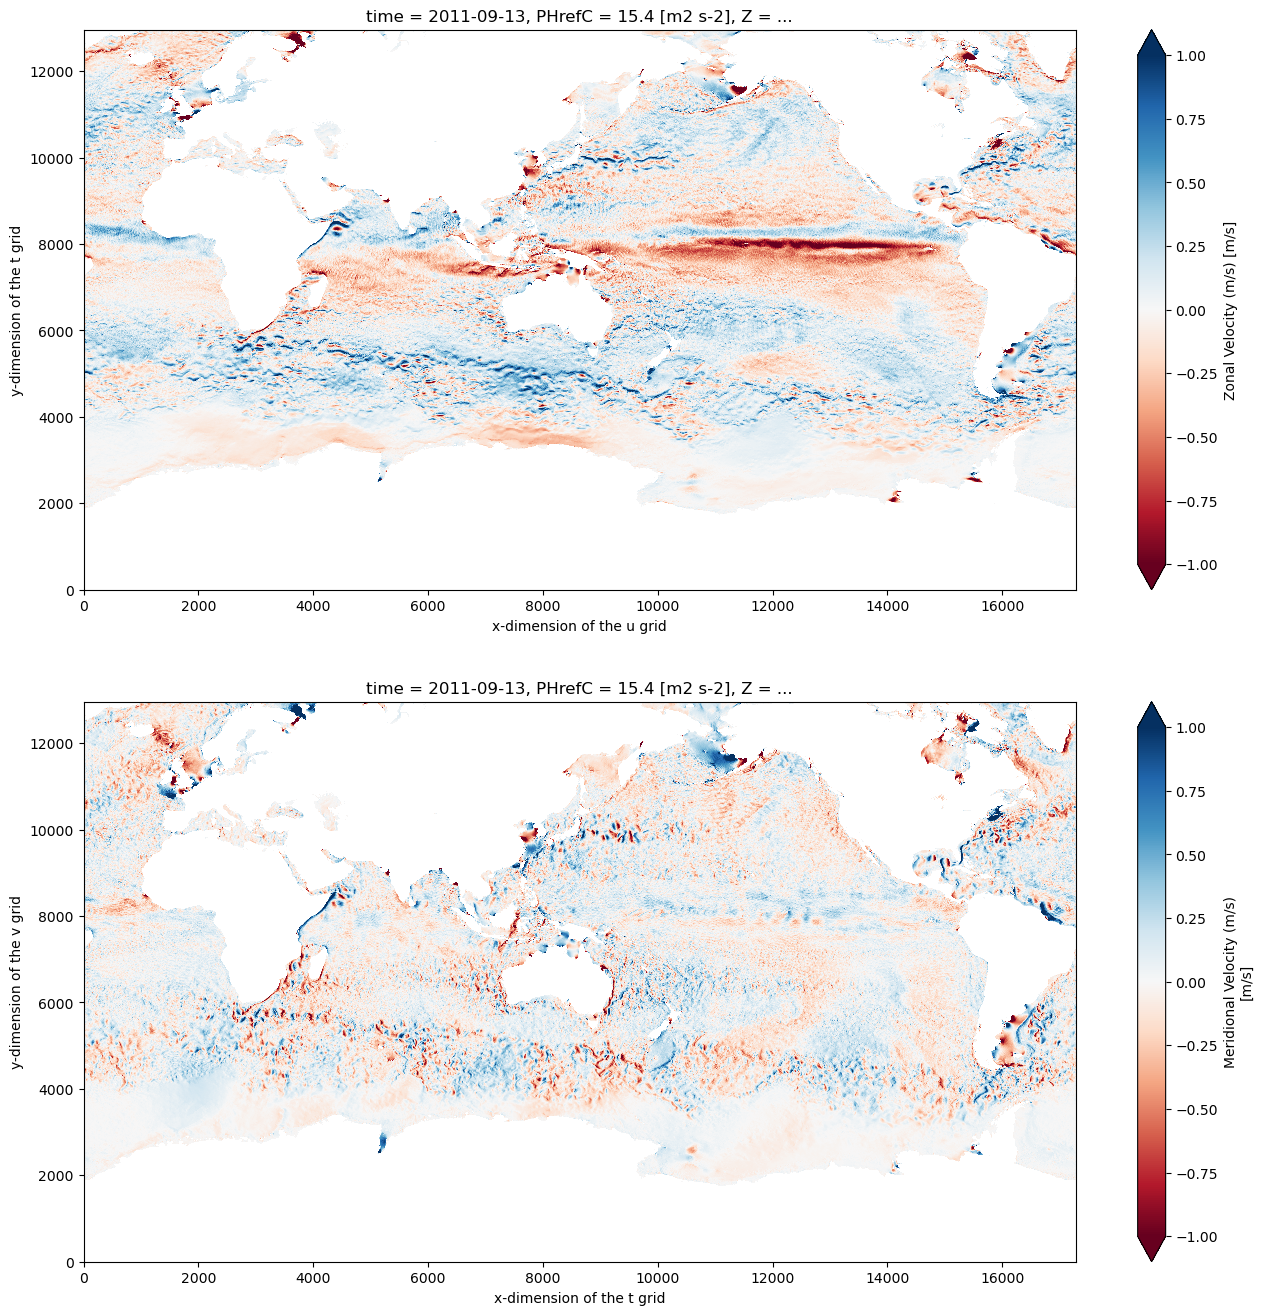

In [15]:

fig = plt.figure(figsize=[16,16])
ax = fig.add_subplot(211)
ds.isel(time=0).U.plot.imshow(ax=ax,vmin=-1,vmax=1,cmap="RdBu")
ax = fig.add_subplot(212)
ds.isel(time=0).V.plot.imshow(ax=ax,vmin=-1,vmax=1,cmap="RdBu")
# fig.savefig("pangeo.png",dpi=600)

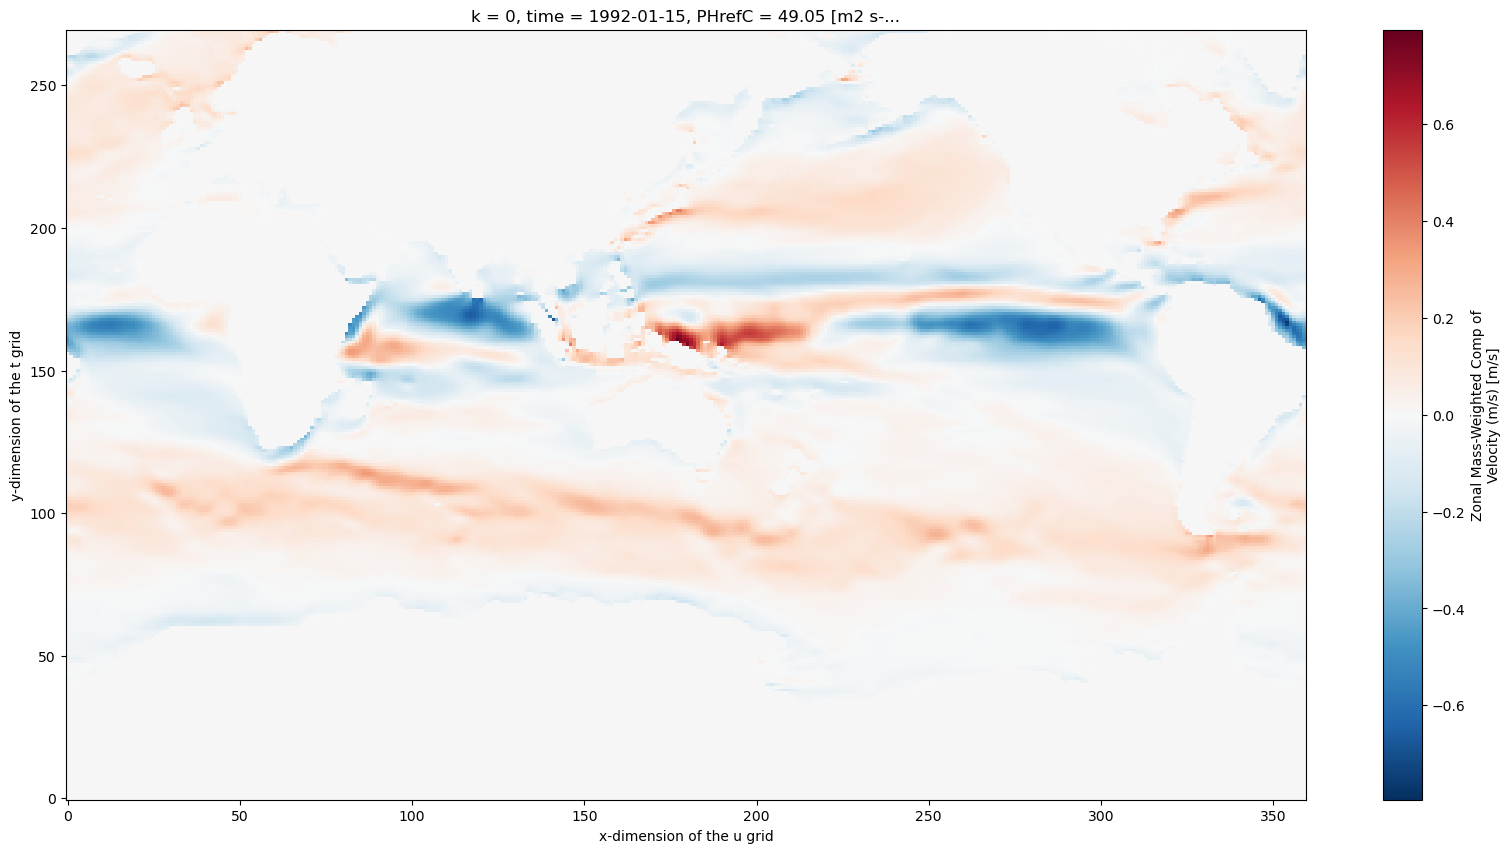

In [11]:
from intake import open_catalog
from xmitgcm import llcreader

cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean.yaml")
ds  = cat["ECCOv4r3"].to_dask()
ds_ll = llcreader.llcmodel.faces_dataset_to_latlon(ds)
ds_ll.UVELMASS[0, 0].load().plot(figsize=(20, 10))